## Support Vector Regression

<font color='grey'>Author : Surejya Suresh </font> | [GitHub](https://github.com/surejyaa) | [LinkedIn](https://www.linkedin.com/in/surejyaa)

### Import required packages

In [1]:
import pandas as pd #data manipulation and analysis
import numpy as np #linear algebra
import matplotlib.pyplot as plt #visualization

from sklearn.preprocessing import StandardScaler #Feature Scaling
from sklearn.svm import SVR

### Import dataset

In [2]:
data = pd.read_csv("datasets/position_salaries.csv")
data.head()  #head of the dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
data.tail()  #tail of the dataset

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
data.shape  #dimension of the dat: (rows,columns)

(10, 3)

In [5]:
# input feature
X = data.iloc[:, 1:-1].values

#target feature
y = data.iloc[:, -1].values

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

### Feature Scaling

In [8]:
x_std_scalar = StandardScaler()
X_scaled = x_std_scalar.fit_transform(X)
X_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [9]:
y = y.reshape(len(y),1)
y_std_scalar = StandardScaler()
y_scaled = y_std_scalar.fit_transform(y)
y_scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

### Training the Support Vector Regression model

In [10]:
model_svr = SVR(kernel='rbf')
model_svr.fit(X_scaled, y_scaled)

C:\Users\USER\anaconda3\envs\env_py39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

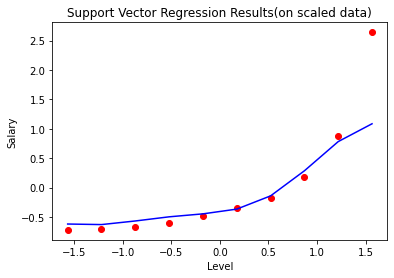

In [11]:
#Visualizing the results for support vector regression - on scaled data

plt.scatter(X_scaled, y_scaled, color='red')
plt.plot(X_scaled, model_svr.predict(X_scaled), color='blue')
plt.title('Support Vector Regression Results(on scaled data)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

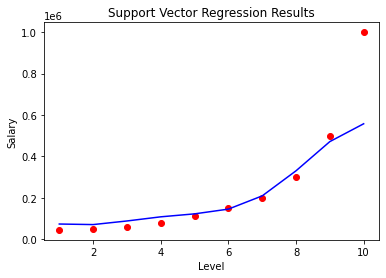

In [12]:
#Visualizing the results for support vector regression - on actual scale

plt.scatter(x_std_scalar.inverse_transform(X_scaled), y_std_scalar.inverse_transform(y_scaled), color='red')
plt.plot(x_std_scalar.inverse_transform(X_scaled), 
         y_std_scalar.inverse_transform(model_svr.predict(X_scaled).reshape(len(X_scaled),1)), color='blue')
plt.title('Support Vector Regression Results')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

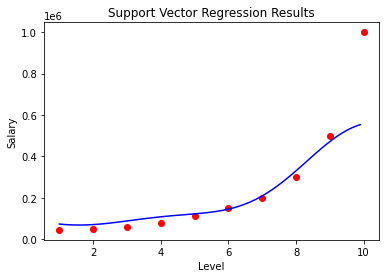

In [13]:
#Visualizing - smoother curve
X_grid = np.arange(min(x_std_scalar.inverse_transform(X_scaled)), max(x_std_scalar.inverse_transform(X_scaled)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(x_std_scalar.inverse_transform(X_scaled), y_std_scalar.inverse_transform(y_scaled), color='red')
plt.plot(X_grid, 
         y_std_scalar.inverse_transform(model_svr.predict(x_std_scalar.transform(X_grid)).reshape(len(X_grid),1)), color='blue')
plt.title('Support Vector Regression Results')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()